In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import larp
import larp.io as lpio

In [16]:
field = lpio.loadRGeoJSONFile("test/data.rgj")

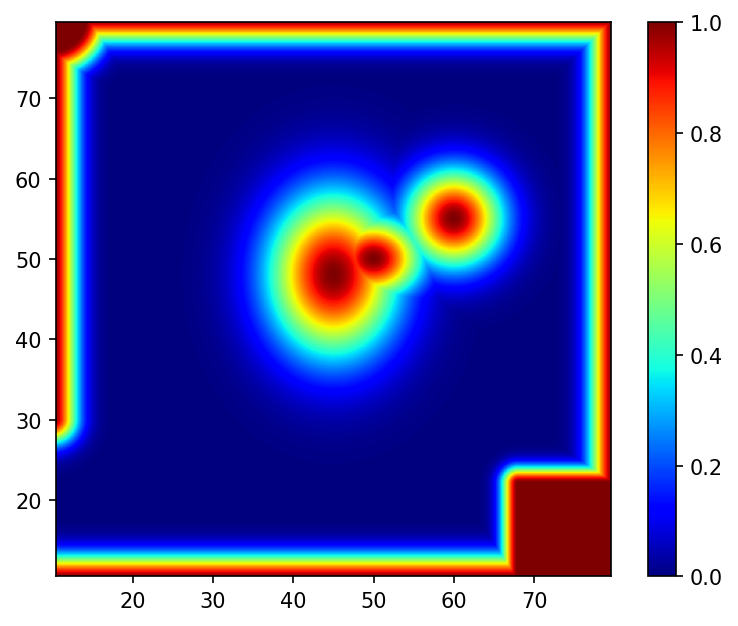

In [17]:
display = field.to_image(resolution=400, center_point=[45, 45])

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar()
plt.clim(0.0,1.0)
plt.show()

In [18]:
edges = [0.1, 0.2, 0.4, 0.6, 0.8]
quad_tree = larp.quad.QuadTree(field, minimum_sector_length=2, maximum_sector_length=10, boundaries=edges)
quad_tree.build()

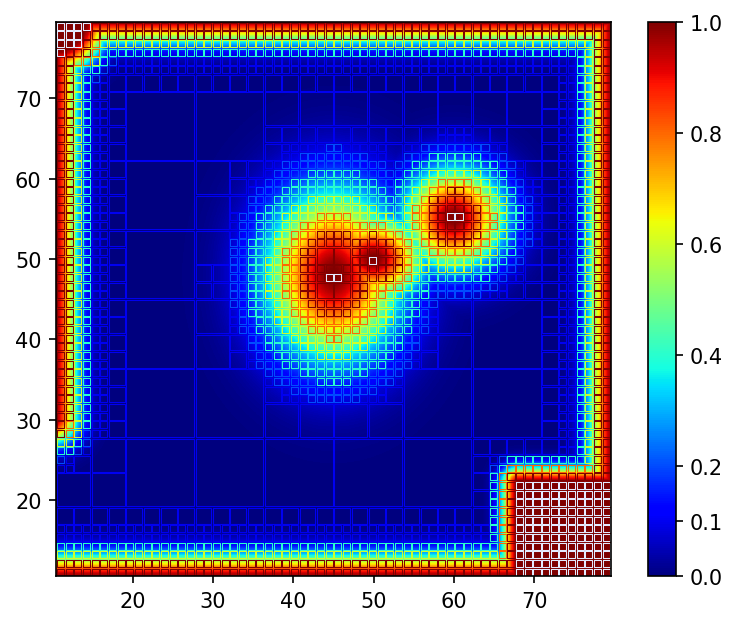

In [19]:
boundaries_lines = quad_tree.to_boundary_lines_collection(margin=0.1)
boundaries_lines_zones = quad_tree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()

In [20]:
routing_graph = larp.graph.RouteGraph(quad_tree=quad_tree, build_graph=True)

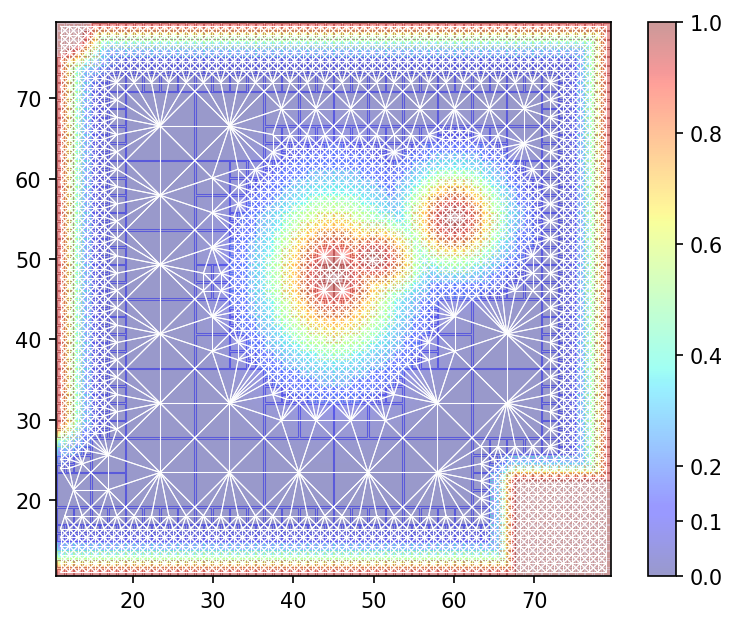

In [21]:
routes_lines = routing_graph.to_routes_lines_collection()

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.4)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=0.4, linewidth=0.5)
plt.plot(*routes_lines, color="#fff", alpha=1.0, linewidth=0.5)
plt.show()

In [22]:
start = (20, 20) # (x, y)
end = (62, 55)
k=1.2

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(k*(1.0 - x + 1e-10)), alg="A*")
# route = routing_graph.find_route(start, end, scale_tranform=lambda x: x + 1, alg="A*")
print(f"Route found: {route is not None}")

Route found: True


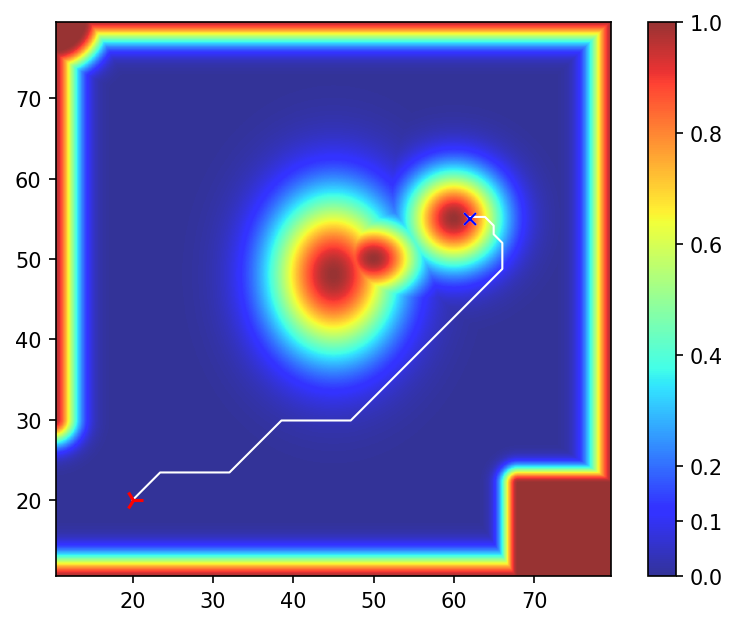

In [23]:
route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

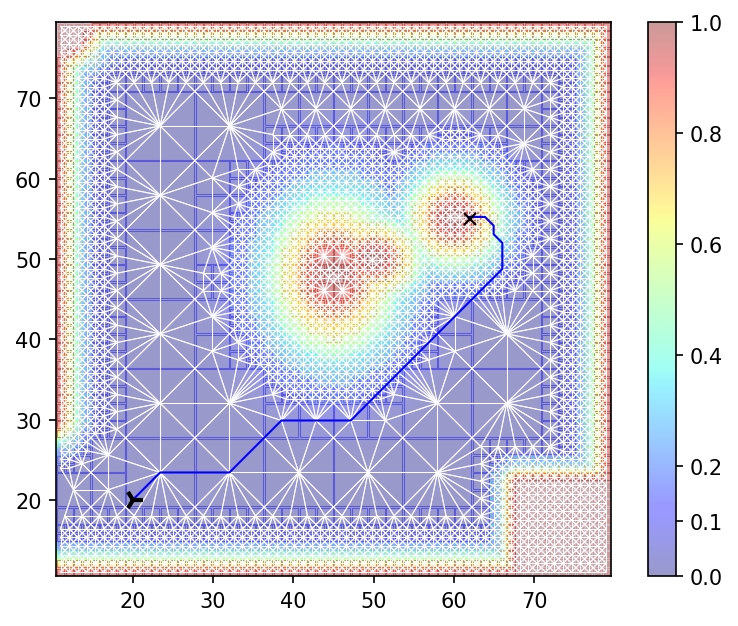

In [24]:
plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.4)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=0.4, linewidth=0.5)
plt.plot(*routes_lines, color="#fff", alpha=0.9, linewidth=0.5)
plt.plot(route_path[:, 0], route_path[:, 1], color="#0000ff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'k4', markersize=10.0, markeredgewidth=2.0)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'kx')
plt.show()

In [26]:
# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Distance traveled: 67.83704349202868
Total area under route: 6.720862961112152
Average area under route: 0.09907364199770734
Total area under route (scaled): 21.401467998236903
Average area under route (scaled): 0.315483501293091
